SERIE TEMPORAL USANDO MACHINE LEARNING






In [ ]:
# Importando a biblioteca pandas para manipulação e análise de dados.
import pandas as pd

# Importando a biblioteca pandas para manipulação e análise de dados.
import pandas as pd

# Importando a biblioteca matplotlib.pyplot para criação de gráficos estáticos, animados e interativos.
import matplotlib.pyplot as plt

# Importando a função seasonal_decompose da biblioteca statsmodels para decomposição de séries temporais.
from statsmodels.tsa.seasonal import seasonal_decompose

# Importando a biblioteca seaborn para visualização de dados baseada em matplotlib.
import seaborn as sns

# Importando a classe SARIMAX da biblioteca statsmodels para modelagem e previsão de séries temporais.
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Importando a biblioteca numpy para suporte a arrays e matrizes multidimensionais e operações matemáticas de alto nível.
import numpy as np

# Importando a classe MinMaxScaler da biblioteca sklearn para normalização de dados.
from sklearn.preprocessing import MinMaxScaler

# Importando a classe Sequential da biblioteca tensorflow.keras para construção de modelos de redes neurais.
from tensorflow.keras.models import Sequential

# Importando as camadas LSTM, Dense e Dropout da biblioteca tensorflow.keras para construção de redes neurais.
from tensorflow.keras.layers import LSTM, Dense, Dropout



In [ ]:
# Carregar os dados do Excel
dados = pd.read_excel('ml.xlsx', sheet_name='Dados')

# Converter a coluna de data
dados['MES_ANO'] = pd.to_datetime(dados['MES_ANO'], format='%b/%y')

# Preencher valores ausentes ou tratar outliers conforme necessário
dados = dados.fillna(method='ffill')


##ANALISE EXPLORATÓRIA

Usamos para verificar alguns Dados sobre a Serie como por exemplo, ela tem sazionalidade Anual e é crescente ou seja dependendo da epoca do ano já podemos esperar pequenas variações seja negativas ou positivas.


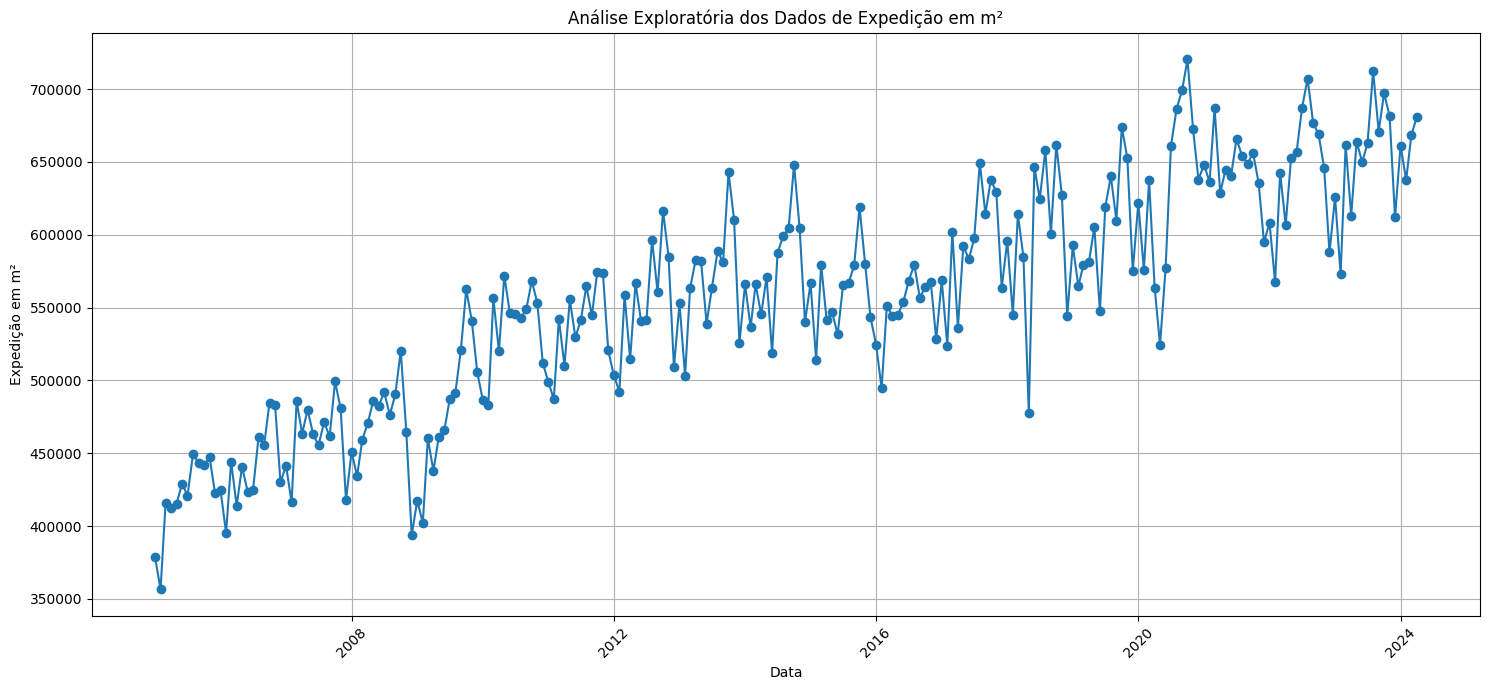

In [ ]:

# Plotar os dados de expedição em m²
plt.figure(figsize=(15, 7))
plt.plot(dados['MES_ANO'], dados['Expedição M2'], marker='o')
plt.title('Análise Exploratória dos Dados de Expedição em m²')
plt.xlabel('Data')
plt.ylabel('Expedição em m²')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

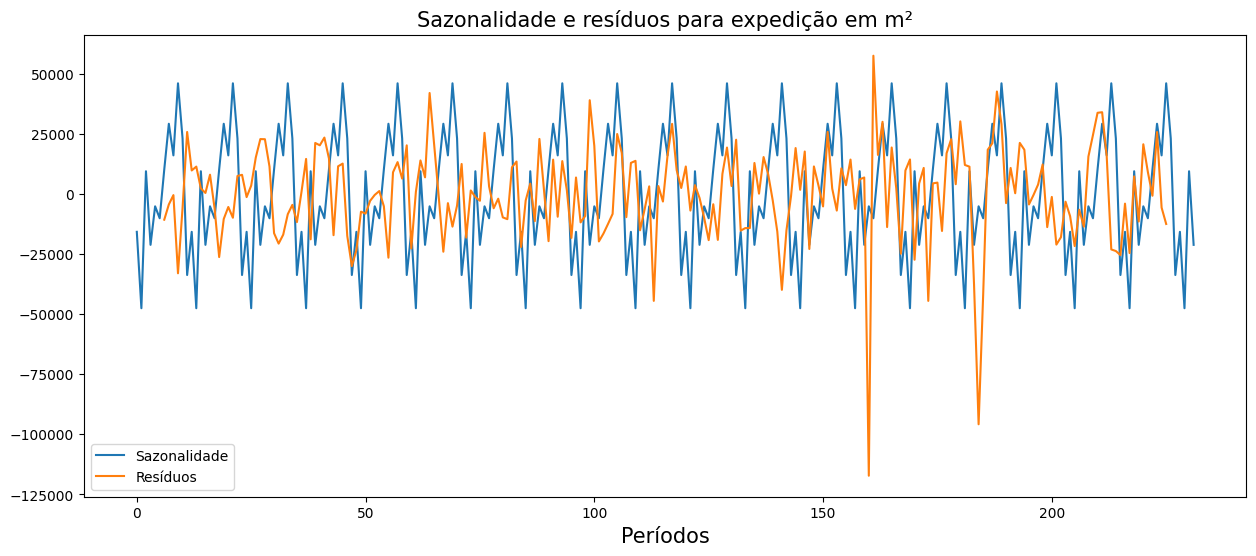

In [ ]:
oresult = seasonal_decompose(dados['Expedição M2'], model='additive', period=12)

# Plot the seasonal component
plt.figure(figsize=(15, 6))
result.seasonal.plot(legend=True, label='Sazonalidade')
result.resid.plot(legend=True, label='Resíduos')
plt.xlabel('Períodos', size=15)
plt.title('Sazonalidade e resíduos para expedição em m²', size=15)
plt.show()


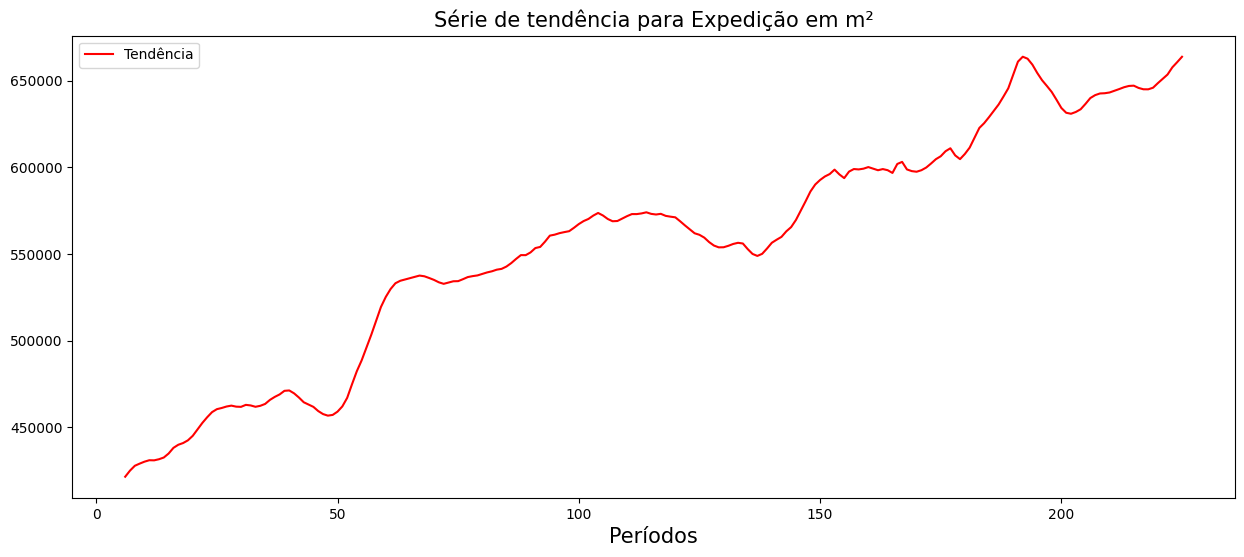

In [ ]:
plt.figure(figsize=(15,6))
result.trend.plot(legend=True, color='r', label='Tendência')
plt.xlabel('Períodos', size=15)
plt.title('Série de tendência para Expedição em m²', size=15)
plt.show()


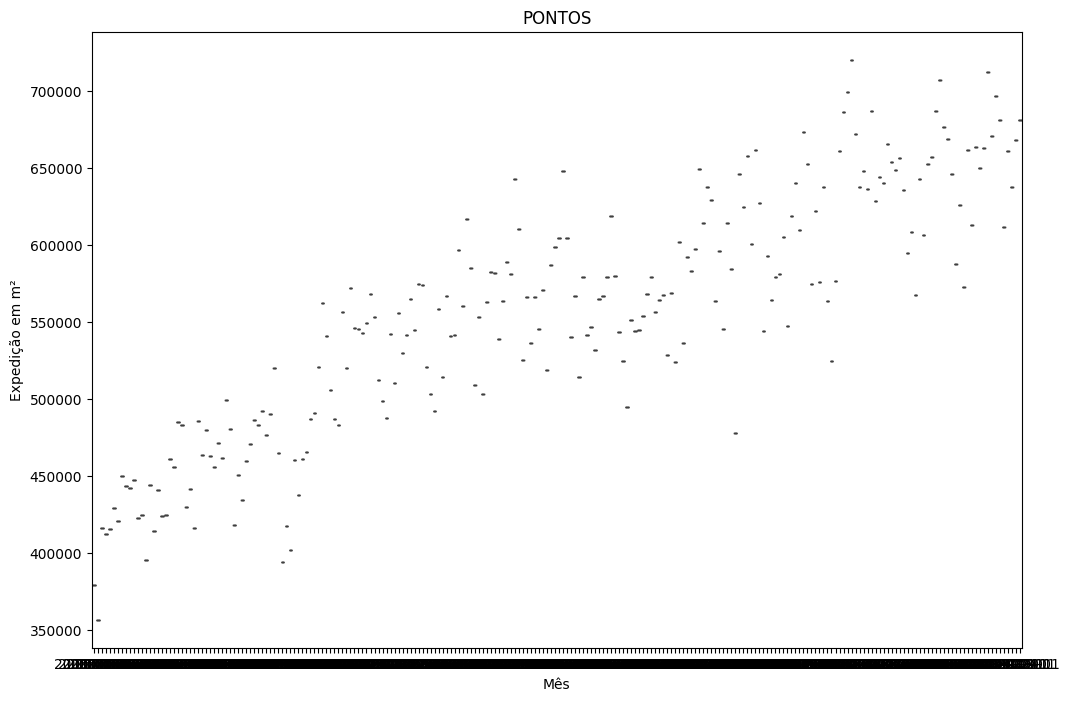

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.boxplot(x='MES_ANO', y='Expedição M2', data=dados, order=dados['MES_ANO'])
plt.title('PONTOS')
plt.xlabel('Mês')
plt.ylabel('Expedição em m²')
plt.show()


##IDENTIFICAÇÃO DA SERIE TEMPORAL

Alta Autocorrelação Inicial: A autocorrelação começa próxima de 1, indicando uma forte correlação positiva entre as observações iniciais e seus valores anteriores.
Decaimento Gradual: A autocorrelação diminui à medida que o lag aumenta, o que é típico em dados de séries temporais que mostram um padrão sazonal ou cíclico.
Confiança: A área sombreada sugere intervalos de confiança para as estimativas de autocorrelação, indicando a precisão dessas estimativas.

<Figure size 1200x600 with 0 Axes>

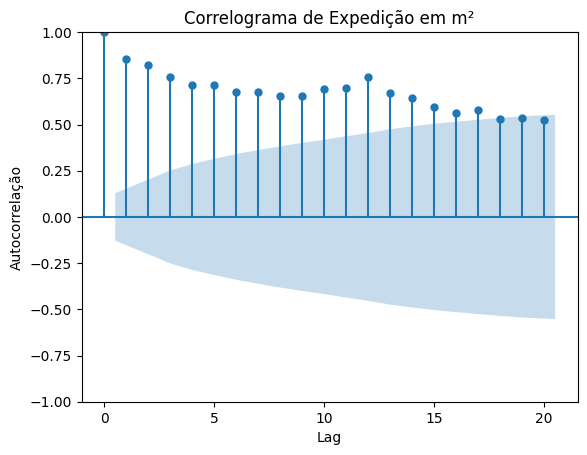

<Figure size 1200x600 with 0 Axes>

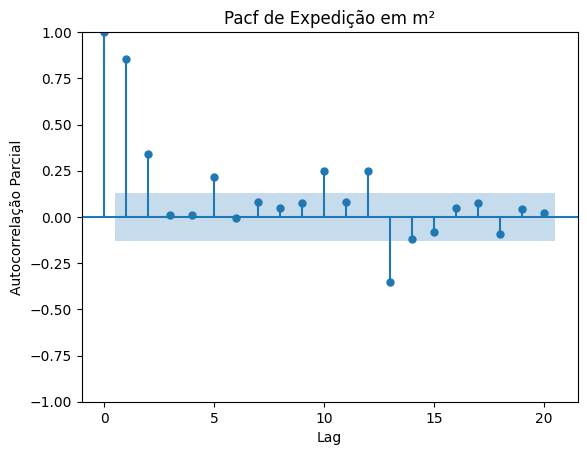

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(dados['Expedição M2'], lags=20, alpha=0.05)
plt.title('Correlograma de Expedição em m²')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação')
plt.show()

# Plot the partial autocorrelation function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(dados['Expedição M2'], lags=20, alpha=0.05)
plt.title('Pacf de Expedição em m²')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação Parcial')
plt.show()


##MACHINE LEARNING

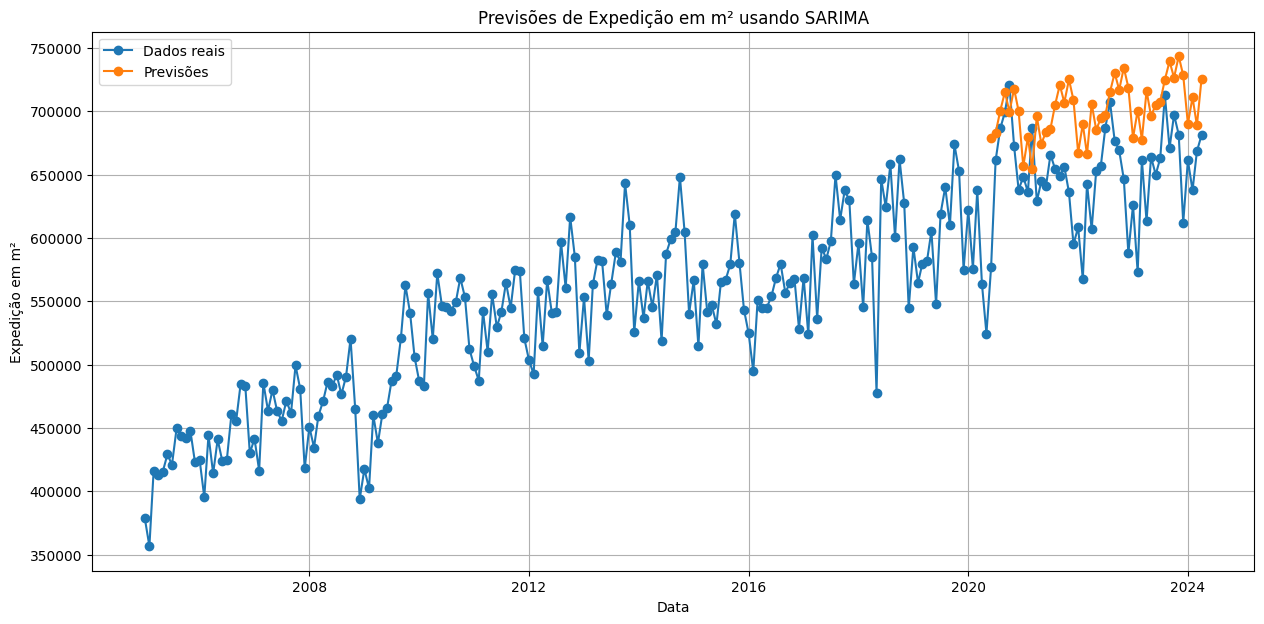

In [ ]:
#ABORDAGEM ESTATISTICA PARA USARMOS DE COMPARAÇÃO

import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model
model = SARIMAX(dados['Expedição M2'], order=(1, 1, 3), seasonal_order=(1, 0, 1, 12))

# Fit the model
results = model.fit()

# Make predictions
predictions = results.forecast(len(test_data))

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(dados['MES_ANO'], dados['Expedição M2'], marker='o', label='Dados reais')
plt.plot(dados['MES_ANO'][train_size:], predictions, marker='o', label='Previsões')
plt.title('Previsões de Expedição em m² usando SARIMA')
plt.xlabel('Data')
plt.ylabel('Expedição em m²')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
6/6 [==============================] - 8s 10ms/step - loss: 0.2526
Epoch 2/10
6/6 [==============================] - 0s 14ms/step - loss: 0.2240
Epoch 3/10
6/6 [==============================] - 0s 16ms/step - loss: 0.1947
Epoch 4/10
6/6 [==============================] - 0s 10ms/step - loss: 0.1648
Epoch 5/10
6/6 [==============================] - 0s 12ms/step - loss: 0.1332
Epoch 6/10
6/6 [==============================] - 0s 10ms/step - loss: 0.1009
Epoch 7/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0700
Epoch 8/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0439
Epoch 9/10
6/6 [==============================] - 0s 10ms/step - loss: 0.0221
Epoch 10/10
2/2 [==============================] - 2s 13ms/step


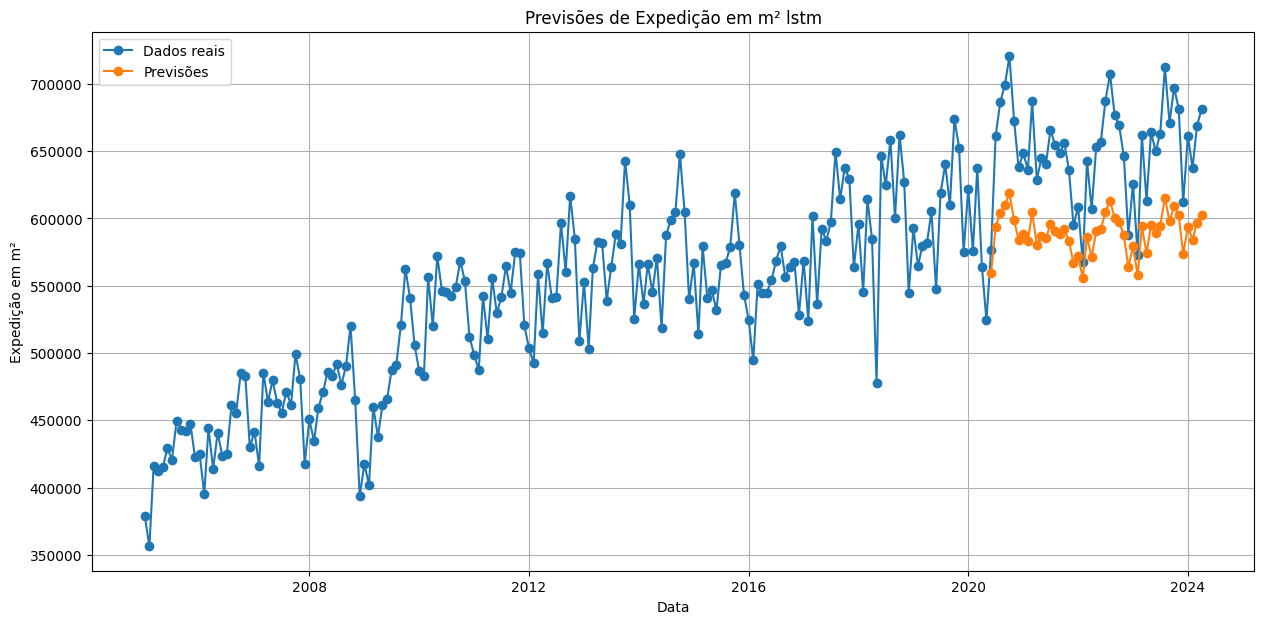

In [ ]:
#ML COM LSTM FUNCIONA MUITO BEM PARA SERIES TEMPORAIS
# Normalize the data
scaler = MinMaxScaler()
data_normalizada = scaler.fit_transform(dados['Expedição M2'].values.reshape(-1, 1))

# Split the data into train and test sets
train_size = int(len(data_normalizada) * 0.8)
train_data, test_data = data_normalizada[:train_size], data_normalizada[train_size:]

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(train_data, train_data, epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(test_data)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)


# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(dados['MES_ANO'], dados['Expedição M2'], marker='o', label='Dados reais')
plt.plot(dados['MES_ANO'][train_size:], predictions, marker='o', label='Previsões')
plt.title('Previsões de Expedição em m² lstm')
plt.xlabel('Data')
plt.ylabel('Expedição em m²')
plt.legend()
plt.grid(True)
plt.show()

